Dana Rozenblum & Efrat Magidov
# Assignment: Unsupervised Machine Learning \ Clustering

## Part 1: Partitional Clustering

In this assignment you will experience with partitional & mixture model clustering. The analyses are made on real datasets under the circumstances of real life challenges in unsupervised machine learning.

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Read blood test results as an EMR from an Excel file

In [2]:
# Open the file
xlsx = pd.ExcelFile('EMR-Blood.xlsx')

# Get the first sheet as an object
sheet1 = xlsx.parse(0)

# Set the Key column as the index
sheet1.set_index("Key", inplace=True)

# Show first 10 rows
sheet1[:10]

,Na,K,ALT,AST,WBC,RBC,Hgb,Hct
Key,,,,,,,,
1,141,4.65,31.92,35.01,10.25,4.06,17.6,36.3
2,140,4.96,36.41,16.70,6.13,3.80,13.2,35.6
3,136,3.66,41.43,13.17,5.86,4.26,16.2,43.7
4,136,4.74,23.92,30.33,10.80,4.83,16.1,49.8
5,140,4.74,43.66,20.44,6.59,4.05,12.6,39.1
6,146,3.98,48.41,33.22,4.53,4.04,17.9,47.3
7,144,5.29,44.29,19.28,10.12,3.96,17.2,47.9
8,138,4.57,50.43,16.39,4.66,4.91,13.7,41.5
9,144,3.96,31.51,34.87,4.57,4.72,15.1,47.6


### Blood Test Abbreviations
- Na == Sodium
- K == Potassium
- ALT == Alanine transaminase
- AST == Aspartate transaminase
- WBC == White blood cells
- RBC == Red blood cells
- Hgb == Hemoglobin
- Hct == Hematocrit

### Use K-Means to create clusters according to variables of uniform distribution

In [3]:
# Retrieve the K, WBC and Hgb column values from the dataset to cluster
variables1 = ["K","WBC","Hgb"]
EMR3d1 = sheet1.loc[:, variables1].values

# Run the K-Means algorithm, assuming the correct number of clusters is 5
est = KMeans(5)
est.fit(EMR3d1)
y_pred_KMeans1 = est.predict(EMR3d1) # YOUR CODE HERE
y_pred_KMeans1

array([0, 1, 2, 4, 1, 3, 0, 1, 2, 3, 4, 1, 2, 4, 1, 3, 0, 1, 3, 2, 0, 1,
       3, 0, 1, 2, 0, 1, 3, 2, 0, 1, 3, 4, 1, 2, 4, 1, 3, 2, 0, 1, 2, 0,
       1, 2, 0, 1, 3, 3, 4, 1, 3, 0, 1, 3, 4, 1, 3, 3, 4, 1, 3, 4, 1, 3,
       4, 1, 3, 2, 4, 1, 3, 0, 1, 2, 0, 1, 3, 3, 4, 1, 3, 0, 1, 3, 0, 1,
       2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 3, 3], dtype=int32)

### Make a 3D chart

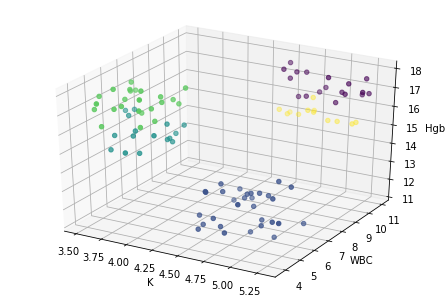

In [4]:
def make_chart (chart_data, y_pred, labels):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.scatter(chart_data[:,0], chart_data[:,1], chart_data[:,2], c=y_pred)

make_chart(EMR3d1, y_pred_KMeans1, variables1)

## Challenge 210
Implement  Lloyd's Algorithm for solving the K-Means problem, as shown in class.
By examining the WCSS, choose a proper threshold to determine algorithm convergence.

Compare your results to the _sklearn_ version - what can affect any differences you might've got?

In [5]:
# Add your code for Challenge 210 after this line, and keep it in this cell.

# Implement K-Means (X being the data)
class k_means():
    
    def __init__(self,k,s):
        self.k = k
        self.tol = 1e-4
        self.seed = s
        
    def plus_plus(self):
        np.random.seed(self.seed)
        self.centroids = [self.X[0]]

        for _ in range(1, self.k):
            dist_sq = np.array([min([np.inner(c-x,c-x) for c in self.centroids]) for x in self.X])
            probs = dist_sq/dist_sq.sum()
            cumulative_probs = probs.cumsum()
            r = np.random.rand()
        
            for j, p in enumerate(cumulative_probs):
                if r < p:
                    i = j
                    break
        
            self.centroids.append(self.X[i])

    def fit(self, X):
        self.X = X
        self.plus_plus()
        self.WCSS = np.inf
        
        while True:
            classes = {}
            distances_to_centroids = np.zeros(np.shape(self.X)[0])
            WCSS_old = self.WCSS
            
            for i in range(self.k):
                classes[i] = []

            #find the distance between the point and cluster; choose the nearest centroid
            for idx,features in enumerate(self.X):
                distances = [np.linalg.norm(features - centroid) for centroid in self.centroids]
                classification = distances.index(min(distances))
                classes[classification].append(features)
                distances_to_centroids[idx] = min(distances)

            self.WCSS = np.sum(distances_to_centroids**2)
            
            if WCSS_old - self.WCSS < self.tol:
                break
            
            #average the cluster datapoints to re-calculate the centroids
            for classification in classes:
                self.centroids[classification] = np.average(classes[classification], axis = 0)
    
    def predict(self, X):
        Y_pred = np.zeros(np.shape(X)[0])
        
        for idx, features in enumerate(X):
            distances = [np.linalg.norm(features - centroid) for centroid in self.centroids]
            classification = distances.index(min(distances))
            Y_pred[idx] = classification
            
        return Y_pred
    
    def WCSS(self):
        #print(self.WCSS)
        return self.WCSS
        #return 1

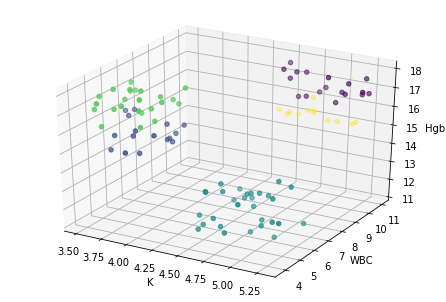

In [6]:
est_own = k_means(5,4)
est_own.fit(EMR3d1)
y_pred_KMeans1_own = est_own.predict(EMR3d1) # YOUR CODE HERE
make_chart(EMR3d1, y_pred_KMeans1_own, variables1)

Our results are very similar to sklearn results. We can spot a few points in the edges of the classes that were classified differently, since we probably didn't converge to the exact same centroids and points with a small difference of the distance between 2 centroids can be classified differently depending on the centroid exact value.

However, when we used another random seed and had different centroids as starting point we received a different classification where the cyan class at the bottom of the chart was divided to twa and the blue ang green groups at the left of the chart were only one group. So we see that the initial selection of centroids has a large effect on the classfication results:

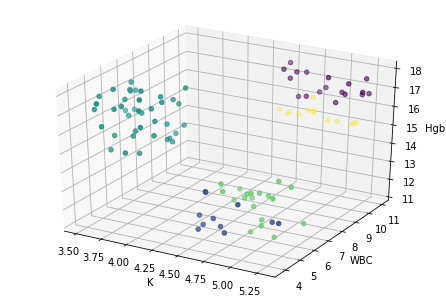

In [7]:
est_own = k_means(5,3)
est_own.fit(EMR3d1)
y_pred_KMeans1_own = est_own.predict(EMR3d1) # YOUR CODE HERE
make_chart(EMR3d1, y_pred_KMeans1_own, variables1)

## Challenge 211

Humans can clearly spot 3 clusters, however, for machines it's much harder to "learn" that. In the above implementation, K-Means was given the value of 5 as K.
Develop a **generic** mechanism for finding the most reasonable number of clusters by:
1. Iterating K over a reasonable range, which should be derived from the number of points
2. Choose a proper K based on the heuristics learned in class
3. Showing the final clusters in a 3D chart

Optimal number of clusters by finding the elbow point: 3


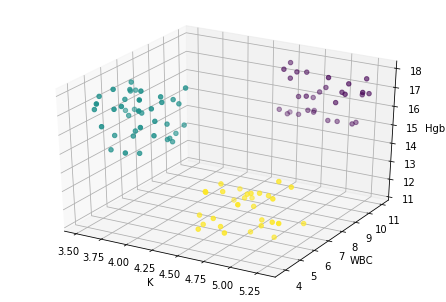

In [22]:
# Add your code for Challenge 211 after this line, and keep it in this cell.

# We use wcss to find the optimal number of clusters
# Having a chart plotting thw wcss per k, if we draw a straight line from point 1 to the maximal k, and if we calculate the
# distance from each point to this line, the point with the largest distance should be the point that contains the elbow.
# We will calculate the wcss per k and for each of them the distance to this line. The point with the largest distance will be
# the elbow point and our desired k

max_k = int(round(np.sqrt(len(EMR3d1))))+1
distortions = []
K = range(1,max_k+1)

for k in K:
    kmeanModel = k_means(k,4)
    kmeanModel.fit(EMR3d1)
    distortions.append(kmeanModel.WCSS)

distances = []
p1 = np.array([1,distortions[0]])
p2 = np.array([max_k,distortions[max_k - 1]])

for i in range(0,max_k):
    p3 = np.array([i+1,distortions[i]])
    dist = np.linalg.norm(np.cross(p2-p1, p1-p3))/np.linalg.norm(p2-p1)
    distances.append(dist)

print("Optimal number of clusters by finding the elbow point:",np.argmax(distances)+1)

est_3 = k_means(3,4)
est_3.fit(EMR3d1)
y_pred_KMeans3 = est_3.predict(EMR3d1) # YOUR CODE HERE
make_chart(EMR3d1, y_pred_KMeans3, variables1)

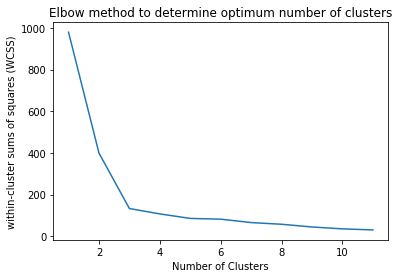

In [23]:
# plot WCSS values to varify the found optimal K is indeed the "elbow"

K_array=np.arange(1,len(distortions)+1,1)
plt.plot(K_array,distortions)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

### Silhouette analysis

Use graphic visualization of the Silhouette score to support your above answer:

In [ ]:
# Add your code for the Sillhouette graphic analysis
# You can use scikit-learn Sillhouette page as a reference

from sklearn.metrics import silhouette_samples, silhouette_score

def plot_Silhouette(X, y, num_clusters):
    # YOUR CODE HERE
    colors = ['blue','orange','green','red','purple','brown','pink','gray','olive','cyan']
    fig = plt.figure()
    ax1 = plt.subplot()
    fig.set_size_inches(6, 4)
    ax1.set_xlim([-0.2, 1])
        
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    cluster_labels = y

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
        
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = colors[i]
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.suptitle(("Silhouette analysis for KMeans clustering "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()


For n_clusters = 2 The average silhouette_score is : 0.5738344190137955


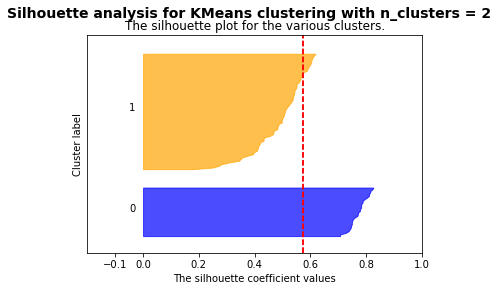

For n_clusters = 3 The average silhouette_score is : 0.644343998493909


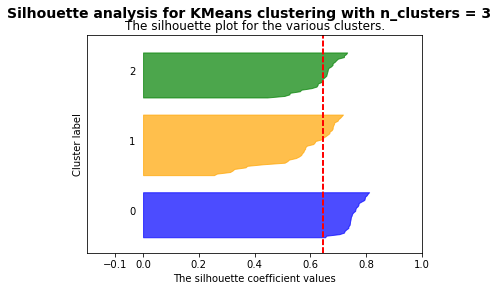

For n_clusters = 4 The average silhouette_score is : 0.5277820110145767


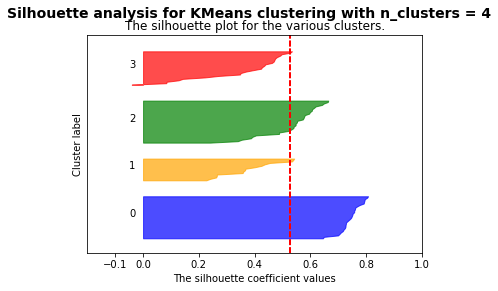

For n_clusters = 5 The average silhouette_score is : 0.47175458354454214


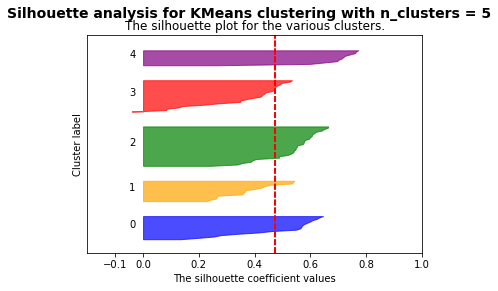

For n_clusters = 6 The average silhouette_score is : 0.4374187982643054


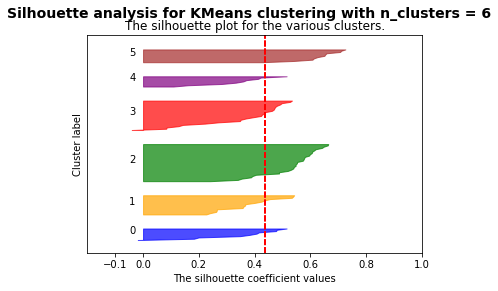

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    clusterer = k_means(n_clusters,4)
    clusterer.fit(EMR3d1)
    y = clusterer.predict(EMR3d1)
    plot_Silhouette(EMR3d1, y, n_clusters)

Yeah! We see that clustering with 3 clusters (like our automated heuristics suggested) got the best average silhouette_score of 0.64.

#### From this section on - please use the sklearn Kmeans

## Part 2: Mixture Models Clustering

### Use K-Means to create clusters according to variables of both uniform and Gaussian distributions

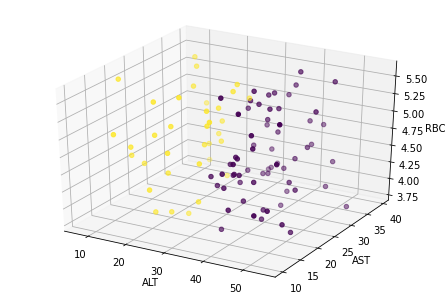

In [ ]:
# Retrieve the ALT, AST and RBC column values from the dataset to cluster
variables2 = ["ALT","AST","RBC"]
EMR3d2 = sheet1.loc[:, variables2].values

# Run the K-Means algorithm
# NOTICE, this time, we know that the correct number of clusters is 2
KMeans2 = KMeans(n_clusters=2)
KMeans2.fit(EMR3d2)
y_pred_KMeans2 = KMeans2.predict(EMR3d2)

# Make a 3D chart
make_chart(EMR3d2, y_pred_KMeans2, variables2)

## Challenge 212
Scientists have found that in this population of patients, RBC distribution is uniform, ALT distribution is a Gaussian and AST distribution is a mixture of two Gaussians. Clearly, even by giving K-Means the correct K, the algorithm got to the wrong conclusion. This separation is "technically" correct, but lacks some underlying understanding of the natural phenomena.

What is the "problem" with this seperation?

# Your answer here

######################################################################################################

**Answer:** 

Since K-means computes the each cluster average as a mean to define centroids, it requires:
1. that the variance of the distribution of each attribute (variable) is spherical;
2. all variables have the same variance;
3. the prior probability for all k clusters is the same, i.e., each cluster has roughly equal number of observations;

If any one of these 3 assumptions is violated, as is the case with the given attributes, then k-means will fail.
K means will split the data to clusters even when there are no "real" to split for. In this case - RBC is uniform and ALT is one gaussian so the split should take place for the AST where there are two groups since it is composed of two gaussians. K means classification can split the AST distribution in such way that the gaussians will get mixed. 
######################################################################################################


In order to exploit the Gaussian characteristic of the AST
1. Find the 2 componenets that comprise the AST feature by applying the GMM algorith with the proper number of components.
2. Assume that the clusters above are correct for the entire dataset (including the other features).
3. Show the final clusters (of EMR3d2) in a 3D chart

mu1:  31.762632566150682  sigma1:  3.5510595933079925
mu2:  17.24934495634183  sigma2:  2.825894010234063


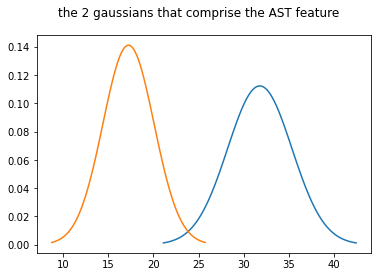

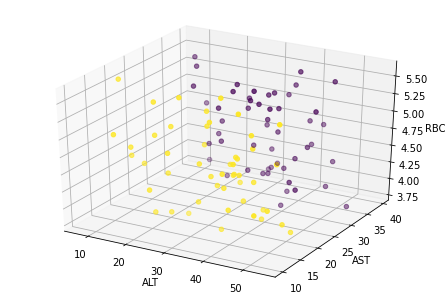

In [ ]:
from sklearn import mixture
from scipy.stats import norm
# Add your code for Challenge 212 after this line, and keep it in this cell.

variables3 = ["AST"]
EMR3d3 = sheet1.loc[:, variables3].values
mix = mixture.GaussianMixture(n_components=2).fit(EMR3d3)
pi, mu, sigma = mix.weights_.flatten(), mix.means_.flatten(), np.sqrt(mix.covariances_.flatten())
x1 = np.linspace(mu[0] - 3*sigma[0], mu[0] + 3*sigma[0], 100)
plt.plot(x1, norm.pdf(x1, mu[0], sigma[0]))
x2 = np.linspace(mu[1] - 3*sigma[1], mu[1] + 3*sigma[1], 100)
plt.plot(x2, norm.pdf(x2, mu[1], sigma[1]))
plt.suptitle("the 2 gaussians that comprise the AST feature")
print("mu1: ",mu[0], " sigma1: ", sigma[0])
print("mu2: ",mu[1], " sigma2: ", sigma[1])
plt.show()

pred_3 = mix.predict(EMR3d3)
make_chart(EMR3d2, pred_3, variables2)

What is the difference between the two clustering results above?

Which one, given the domain knowledge provided to you, makes more sense?

######################################################################################################

**Answer:** 

The difference is that the kmeans clustering is mostly affected by ALT, since it's a simple numerical attribute and therefor has a meaningful average.

The GMM on the other hand divideds the data by the AST attribute. This clustering makes more sense given the domain knowledge on AST distribution.

######################################################################################################





# Good Luck!

